In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['font.family'] = 'serif'

In [3]:
from sipmarray import SiPMunit
from sipmarray import SiPMarray

### SiPM unit

Model: S13370-6050CQ-02, "12x12", by Hamamatsu
--------------------------------------------
Width: 15.0 mm
Height: 15.0 mm
Active width: 12.5 mm
Active height: 12.5 mm
Width tolerance: 0.2 mm
Height tolerance: 0.2 mm
--------------------------------------------
Total unit area: 237.00 mm^2
Active area geometric correction: 1.00
Active area: 144.00 mm^2
--------------------------------------------
Active area fraction: 100.00 %
Photon detection efficiency: 24.00 %


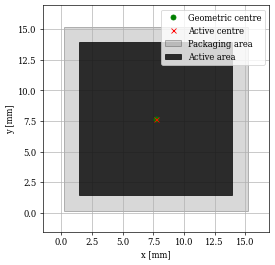

In [4]:
mppc = SiPMunit('quad')
mppc.print_properties()
mppc.plot_model()

Model: S13370-3050, "3x3", by Hamamatsu
--------------------------------------------
Width: 5.9 mm
Height: 6.55 mm
Active width: 3 mm
Active height: 3 mm
Width tolerance: 0.15 mm
Height tolerance: 0.15 mm
--------------------------------------------
Total unit area: 42.00 mm^2
Active area geometric correction: 1.00
Active area: 9.00 mm^2
--------------------------------------------
Active area fraction: 0.00 %
Photon detection efficiency: 24.00 %


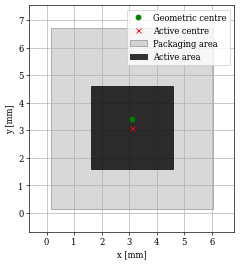

In [5]:
mppc = SiPMunit(model = '3x3')
mppc.print_properties()
mppc.plot_model()

#### Custom unit

In [6]:
param_dict = dict(name = 'low dead space 6x6',
                  width_package = 6.4,
                  height_package = 6.4,
                  width_tolerance = 0.,
                  height_tolerance = 0.,
                  width_active = 6,
                  height_active = 6,
                  active_area_correction = 1.,
                  D_corner_x_active = 0.2+0,
                  D_corner_y_active = 0.2+0,
                  fill_factor = 0.996,
                  pde = 0.24)


Model: low dead space 6x6
--------------------------------------------
Width: 6.4 mm
Height: 6.4 mm
Active width: 6 mm
Active height: 6 mm
Width tolerance: 0.0 mm
Height tolerance: 0.0 mm
--------------------------------------------
Total unit area: 41.00 mm^2
Active area geometric correction: 1.00
Active area: 36.00 mm^2
--------------------------------------------
Active area fraction: 100.00 %
Photon detection efficiency: 24.00 %


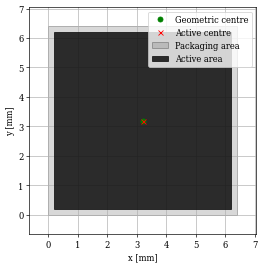

In [7]:
mppc = SiPMunit(
    model = 'custom',
    custom_params=param_dict)
mppc.print_properties()
mppc.plot_model()

## SiPM array

In [9]:
array = SiPMarray(array_diameter=200,
                  border_margin=-10, 
                  intra_sipm_distance=5,
                  sipm_model = 'quad')
array.print_properties()

Array diameter: 200 mm
Margin from the array edge: -10 mm
Number of units: 76
Total array area: 31415.93 mm^2
Total photosensor area: 18024.16 mm^2
Total SiPM active area: 10944.00 mm^2
SiPM coverage: 0.35


### Plot the array

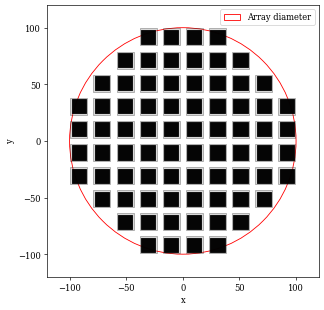

In [10]:
array.plot_sipm_array()

### Plot corners

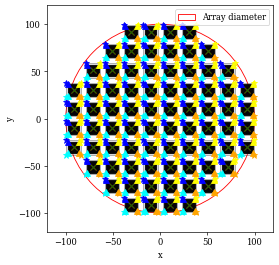

In [11]:
active_centres = array.get_centres()
geometric_centre = array.get_centres(active_area=False)

fig, ax = plt.subplots(1,1)
fig, ax = array.plot_sipm_array(figax= (fig,ax))

corners_active = array.get_corners_active()
corners_package = array.get_corners_package()

for centre_i in range(array.n_sipms):
    _x_active = active_centres[0,centre_i]
    _y_active = active_centres[1,centre_i]
    ax.plot(_x_active, _y_active, 'x', color = 'red', markersize = 8)

    _x_geometric = geometric_centre[0,centre_i]
    _y_geometric = geometric_centre[1,centre_i]
    ax.plot(_x_geometric, _y_geometric, 'x', color = 'green', markersize = 8)

    _ax_corner = corners_active[0,centre_i]
    _ay_corner = corners_active[1,centre_i]
    _bx_corner = corners_active[2,centre_i]
    _by_corner = corners_active[3,centre_i]
    _cx_corner = corners_active[4,centre_i]
    _cy_corner = corners_active[5,centre_i]
    _dx_corner = corners_active[6,centre_i]
    _dy_corner = corners_active[7,centre_i]

    ax.plot(_ax_corner, _ay_corner, '^', color = 'blue', markersize = 8)
    ax.plot(_bx_corner, _by_corner, '^', color = 'yellow', markersize = 8)
    ax.plot(_cx_corner, _cy_corner, '^', color = 'orange', markersize = 8)
    ax.plot(_dx_corner, _dy_corner, '^', color = 'cyan', markersize = 8)

    _ax_corner = corners_package[0,centre_i]
    _ay_corner = corners_package[1,centre_i]
    _bx_corner = corners_package[2,centre_i]
    _by_corner = corners_package[3,centre_i]
    _cx_corner = corners_package[4,centre_i]
    _cy_corner = corners_package[5,centre_i]
    _dx_corner = corners_package[6,centre_i]
    _dy_corner = corners_package[7,centre_i]

    ax.plot(_ax_corner, _ay_corner, '*', color = 'blue', markersize = 8)
    ax.plot(_bx_corner, _by_corner, '*', color = 'yellow', markersize = 8)
    ax.plot(_cx_corner, _cy_corner, '*', color = 'orange', markersize = 8)
    ax.plot(_dx_corner, _dy_corner, '*', color = 'cyan', markersize = 8)

#fig.savefig('test.pdf')
plt.show()

### Export the corners

In [12]:
array.export_corners_active(file_name='corners_active.csv')
array.export_corners_package(file_name='corners_package.csv')
array.export_centres(file_name = 'centres.csv')

### Custom unit array

In [13]:
array = SiPMarray(array_diameter=100,
                  border_margin=0, 
                  intra_sipm_distance=2,
                  sipm_model = 'custom',
                  custom_unit_params=param_dict)
array.print_properties()

Array diameter: 100 mm
Margin from the array edge: 0 mm
Number of units: 96
Total array area: 7853.98 mm^2
Total photosensor area: 3932.16 mm^2
Total SiPM active area: 3456.00 mm^2
SiPM coverage: 0.44


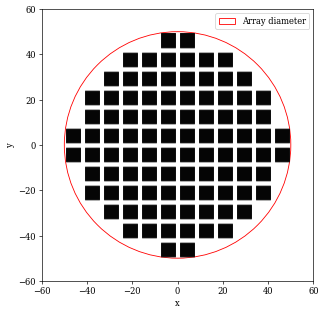

In [14]:
array.plot_sipm_array()